In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf

import sqlite3
import pandas as pd

In [2]:
filename = 'too_combined_s1.0_v3.4_10yrs.db'
name = filename.replace('.db', '')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

In [3]:
bundle_list = []

too_types = ["ToO, GW_case%", "ToO, BBH%", "ToO, LensedBNS%", "ToO, neutrino%", "ToO, SSO%"]

for too_type in too_types:
    sql = "note like '%s'" % too_type
    # col here could be anything
    metric = maf.metrics.CountMetric(col=['night'], metric_name='Nvis')
    # Select all the visits. Could do something like 'filter="r"' 
    slicer = maf.slicers.HealpixSlicer()
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 221 bins, returning 200
  warnings.warn(


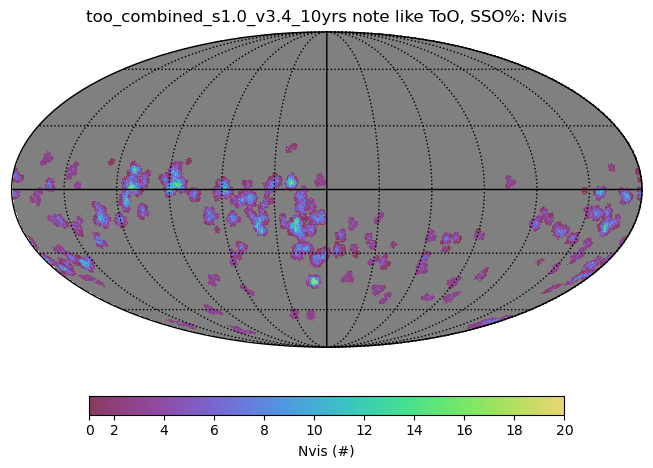

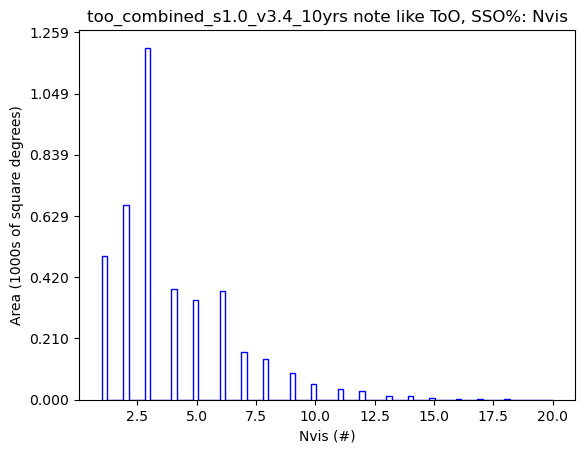

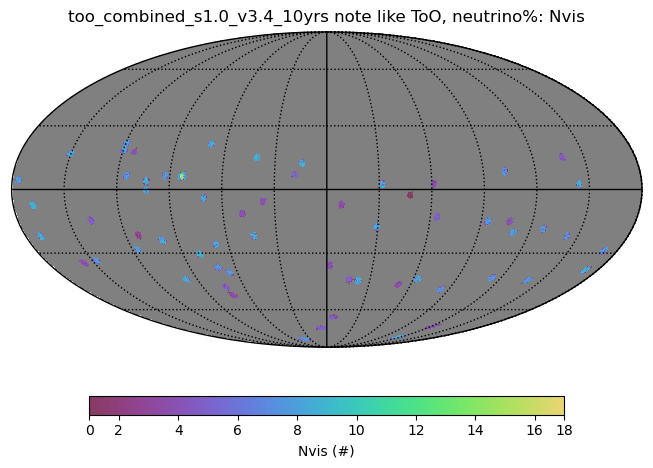

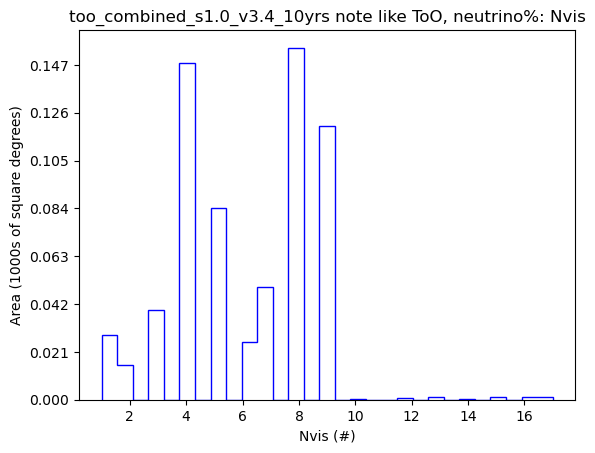

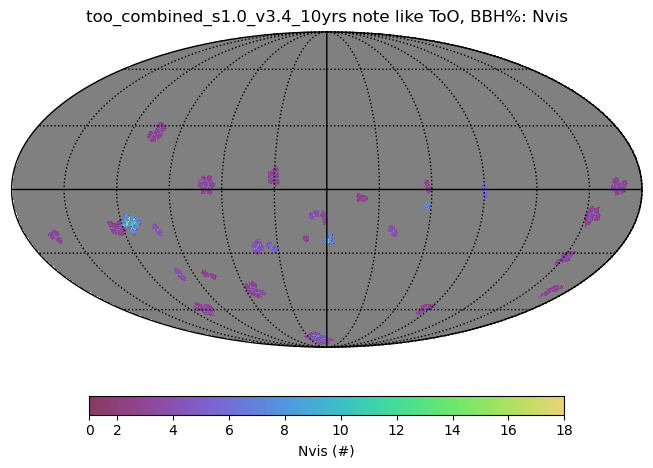

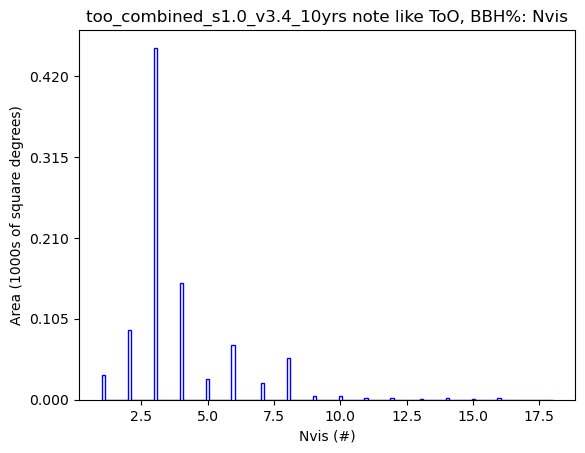

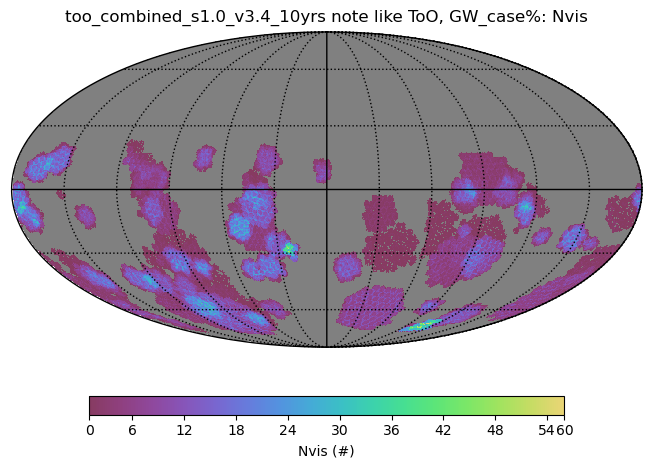

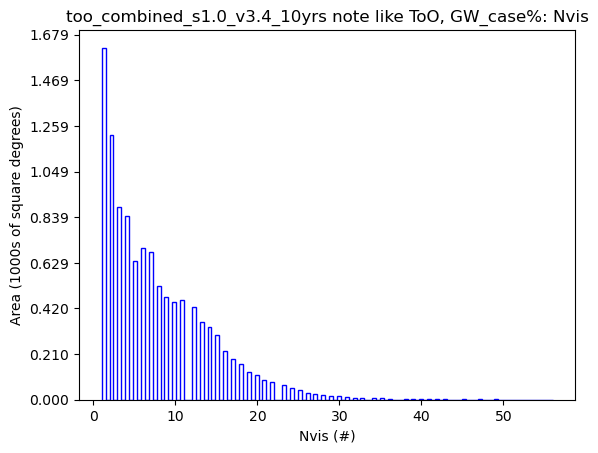

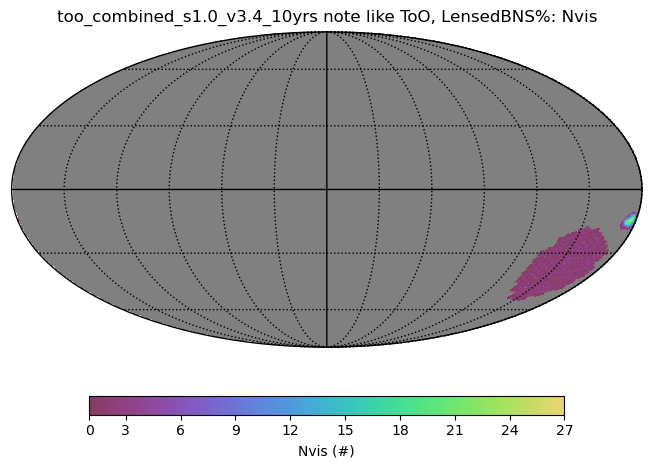

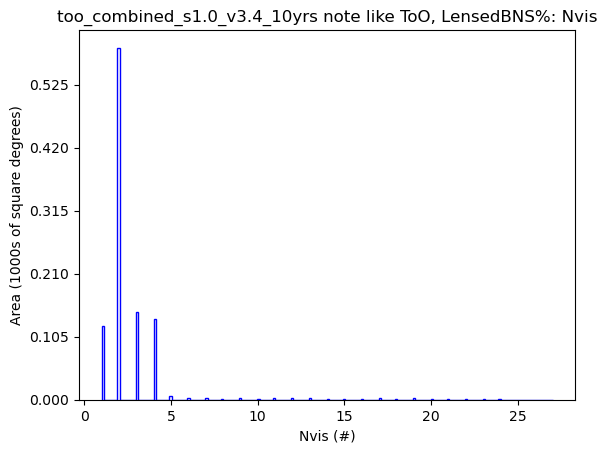

In [4]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, filename, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)




GW: alerts followed 73 , 9478 visits
lensed: alerts followed 2 , 302 visits
BBH: alerts followed 28 , 390 visits
neu: alerts followed 63 , 447 visits
SSO: alerts followed 170 , 1733 visits
Fraction of exptime on ToOs= 0.020423


/var/folders/jv/jdhmc2t93njct5cx375mztcr0000gn/T/ipykernel_36775/2623870546.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Fraction of exptime on ToOs= %f' % (df1.values/df2.values))


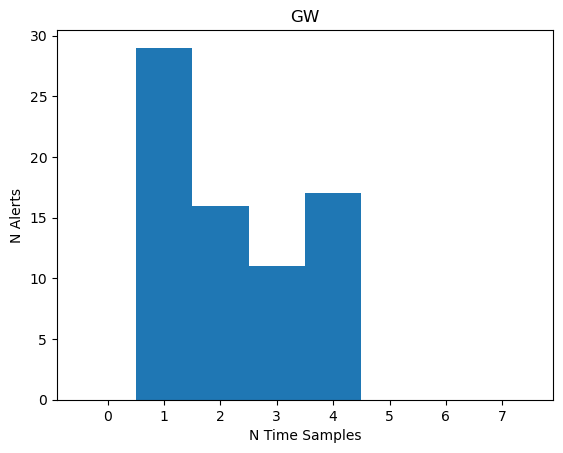

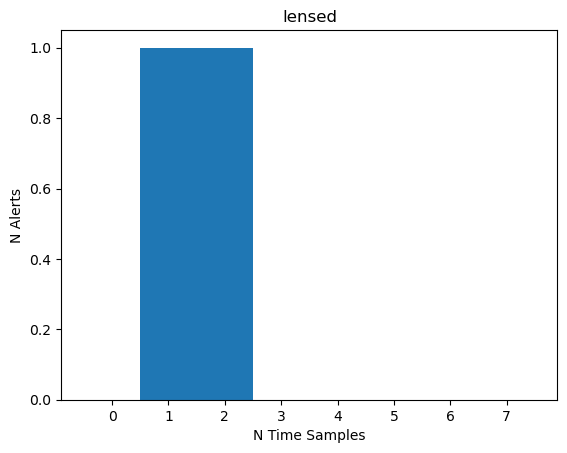

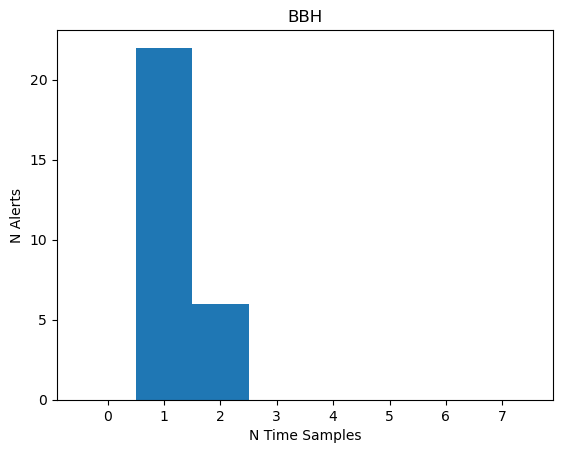

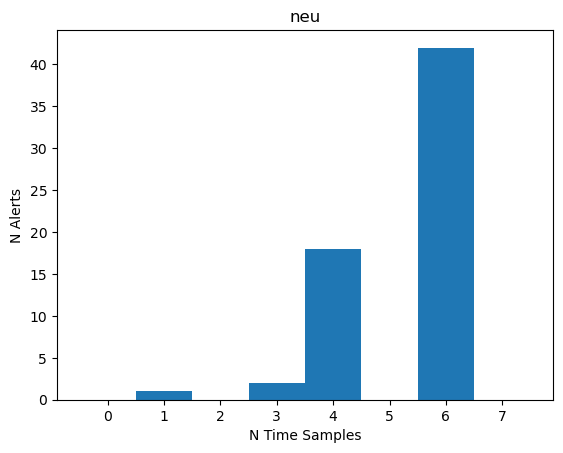

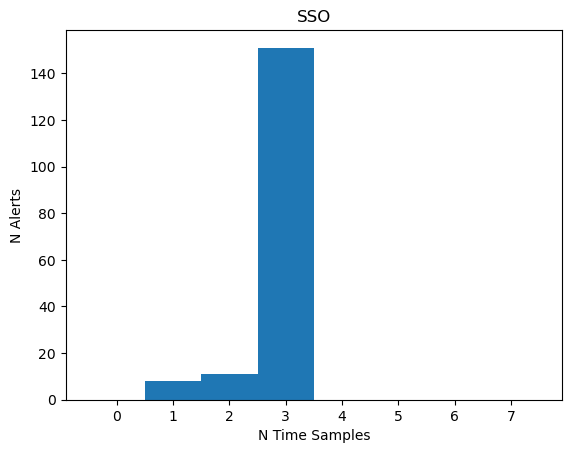

In [5]:


con = sqlite3.connect(filename)

bins = np.arange(0,9,1) - 0.5

for name in ['GW', 'lensed', 'BBH', 'neu', 'SSO']:

    df = pd.read_sql("select note from observations where note like '%%ToO%%%s%%'" % name, con)
    
    print('%s: alerts followed' % name, np.unique([note.split(',')[-1].split('_')[0] for note in df['note']]).size, ', %i visits' % df['note'].shape)


    ending = [note.split(',')[-1] for note in df["note"]]
    ind_i = np.array([(end.split('_')[0].strip(), end.split('_')[-1].strip() ) for end in ending])
    n_samples = []
    for indx in np.unique(ind_i[:,0]):
        good = np.where(ind_i[:,0] == indx)
        n_samples.append(np.size(np.unique(ind_i[good,1])))


    
    #_tmp = plt.hist(n_samples, bins=bins)

    fix, ax = plt.subplots()

    ax.hist(n_samples, bins=bins)
    ax.set_title(name)
    ax.set_xlabel('N Time Samples')
    ax.set_ylabel('N Alerts')


df1 = pd.read_sql("select sum(visitExposureTime) from observations where note like '%ToO%'" , con)
df2 = pd.read_sql("select sum(visitExposureTime) from observations" , con)

print('Fraction of exptime on ToOs= %f' % (df1.values/df2.values))

con.close()
